<a href="https://colab.research.google.com/github/TU24007/EU_M_Math/blob/main/Chap07_Ex01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy,random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame
import math
from scipy import interpolate

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

from sklearn import linear_model
np.random.seed(0)

import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import requests,zipfile
from io import StringIO
import io

from scipy import integrate
import math

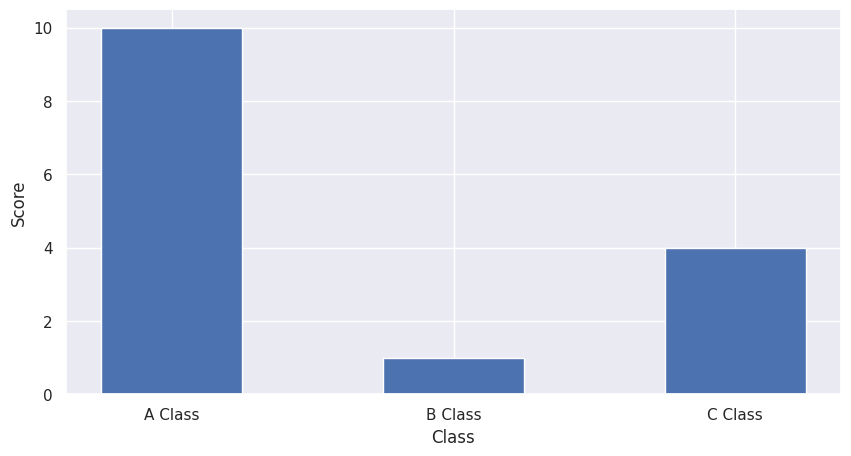

In [2]:
x=[1,2,3]
y=[10,1,4]

plt.figure(figsize=(10,5))
plt.bar(x,y,align='center',width=0.5)

plt.xticks(x,['A Class','B Class','C Class'])

plt.xlabel('Class')
plt.ylabel('Score')

plt.grid(True)

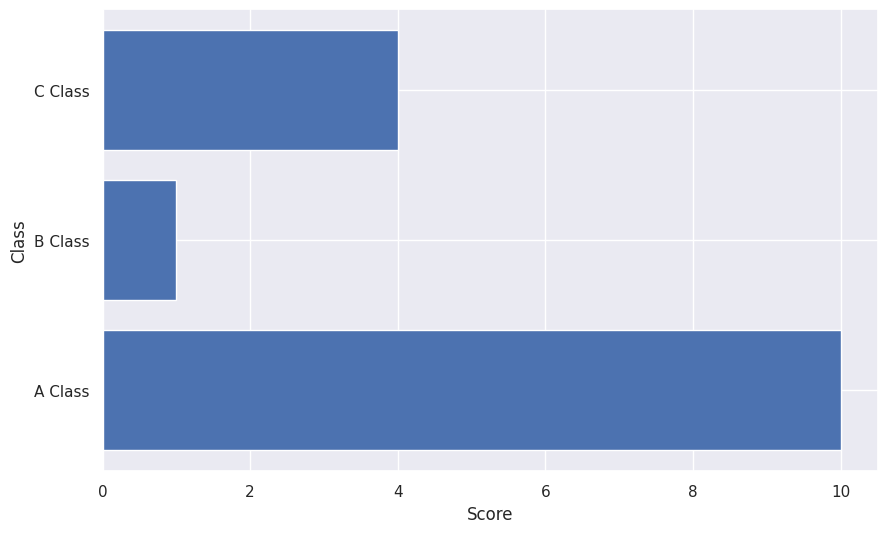

In [3]:
plt.figure(figsize=(10,6))

plt.barh(x,y,align='center')
plt.yticks(x,['A Class','B Class','C Class'])

plt.xlabel('Score')
plt.ylabel('Class')

plt.grid(True)

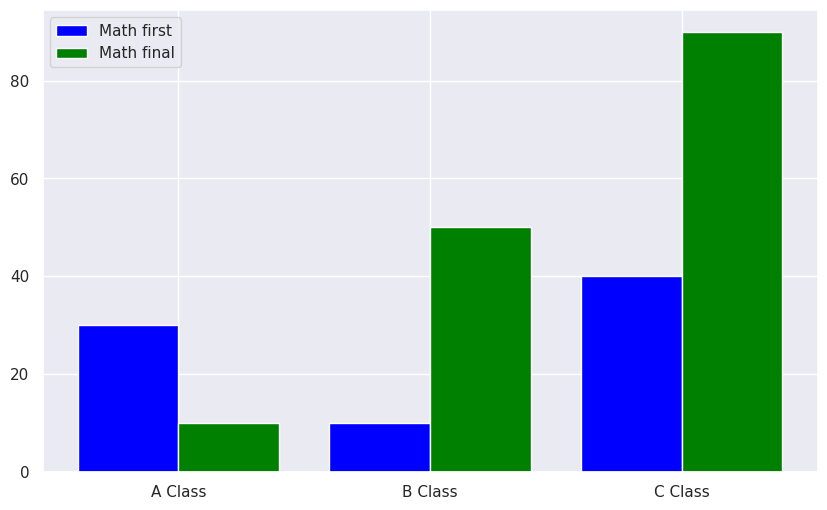

In [5]:
y1=np.array([30,10,40])
y2=np.array([10,50,90])

x=np.arange(len(y1))

w=0.4

plt.figure(figsize=(10,6))

plt.bar(x,y1,color='blue',width=w,label='Math first',align='center')
plt.bar(x+w,y2,color='green',width=w,label='Math final',align='center')

plt.legend(loc='best')
plt.xticks(x+w/2,['A Class','B Class','C Class'])

plt.grid(True)

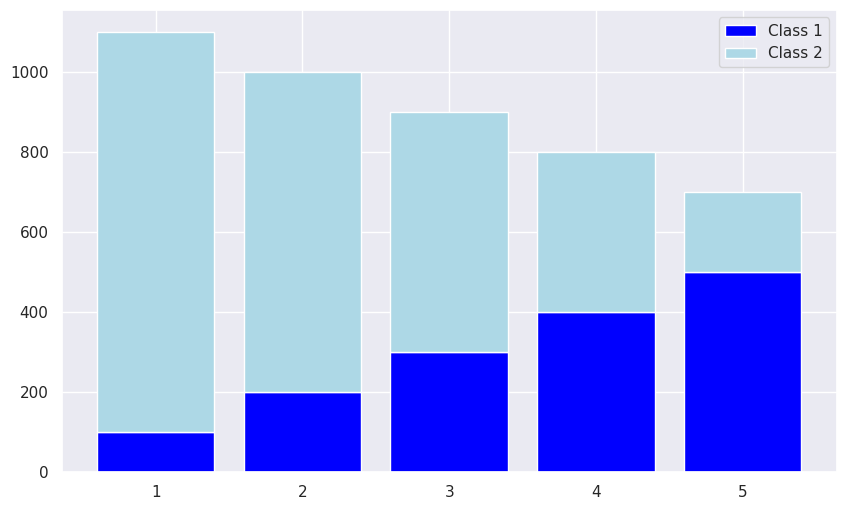

In [7]:
height1=np.array([100,200,300,400,500])
height2=np.array([1000,800,600,400,200])

x=np.array([1,2,3,4,5])

plt.figure(figsize=(10,6))

p1=plt.bar(x,height1,color='blue')
p2=plt.bar(x,height2,bottom=height1,color='lightblue')

plt.legend((p1[0],p2[0]),('Class 1','Class 2'))

(-1.1998593997207165,
 1.1047438740833693,
 -1.0999843660947275,
 1.0999992555283205)

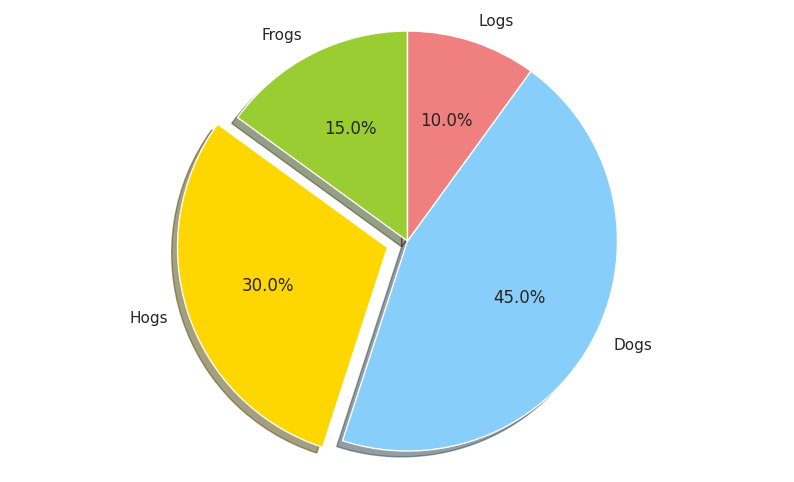

In [8]:
labels=['Frogs','Hogs','Dogs','Logs']
sizes=[15,30,45,10]
colors=['yellowgreen','gold','lightskyblue','lightcoral']
explode=(0,0.1,0,0)

plt.figure(figsize=(10,6))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')

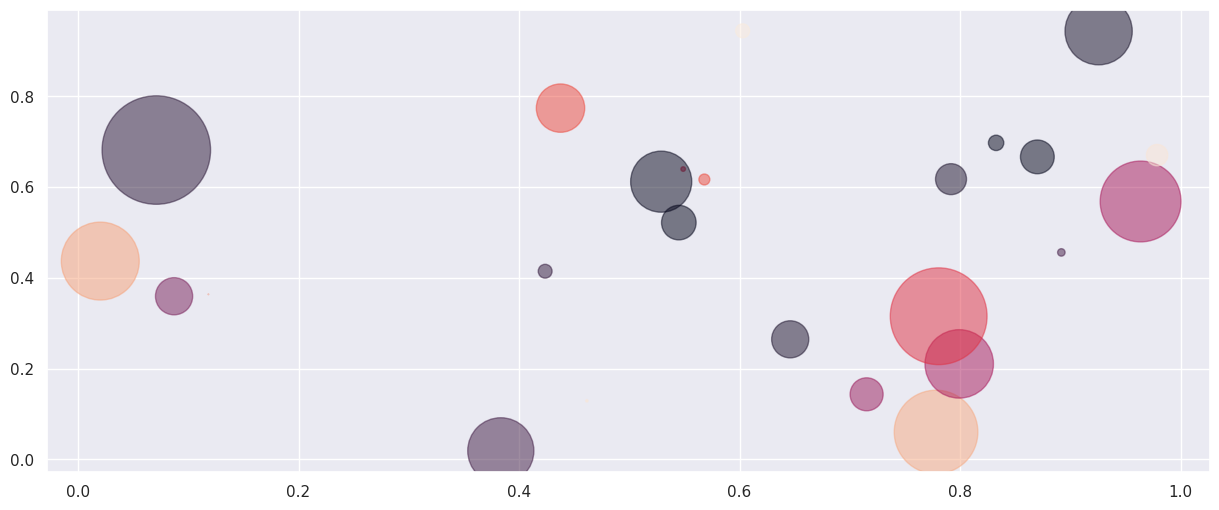

In [9]:
N=25

x=np.random.rand(N)
y=np.random.rand(N)

colors=np.random.rand(N)

area=10*np.pi*(15*np.random.rand(N))**2

plt.figure(figsize=(15,6))
plt.scatter(x,y,s=area,c=colors,alpha=0.5)
plt.grid(True)

In [11]:
idx=pd.date_range('2015/01/01','2015/12/31 23:59',freq='T')

dn=np.random.randint(2,size=len(idx))*2-1

rnd_walk=np.cumprod(np.exp(dn*0.0002))*100

df=pd.Series(rnd_walk,index=idx).resample('B').ohlc()

<Axes: >

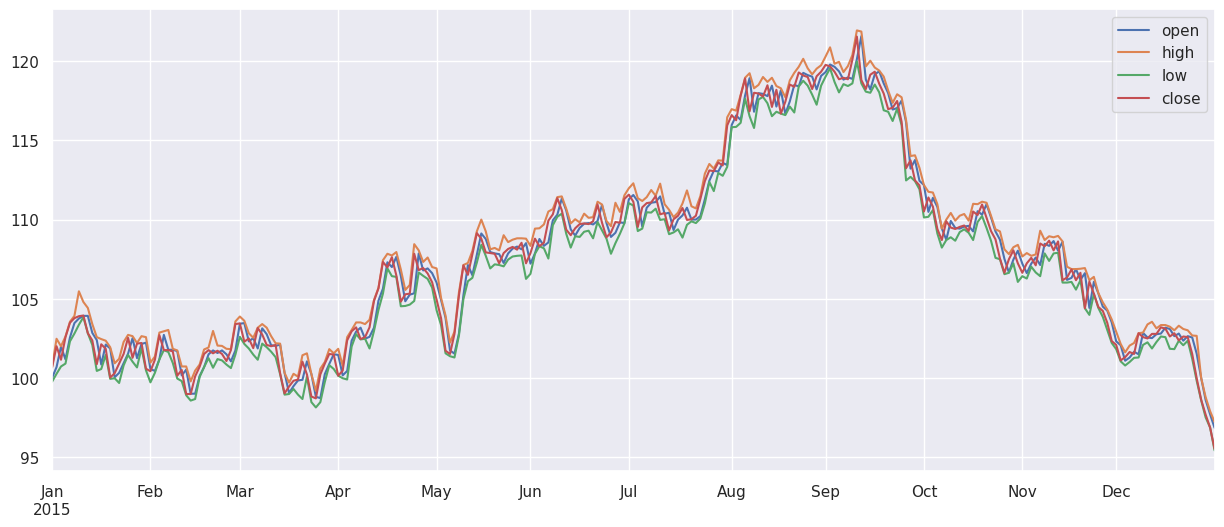

In [12]:
df.plot(figsize=(15,6),legend='best',grid=True)

In [16]:
from plotly.offline import init_notebook_mode,iplot
from plotly import figure_factory as FF

init_notebook_mode(connected=True)

fig=FF.create_candlestick(df.open,df.high,df.low,df.close,dates=df.index)
fig.show(renderer="colab")

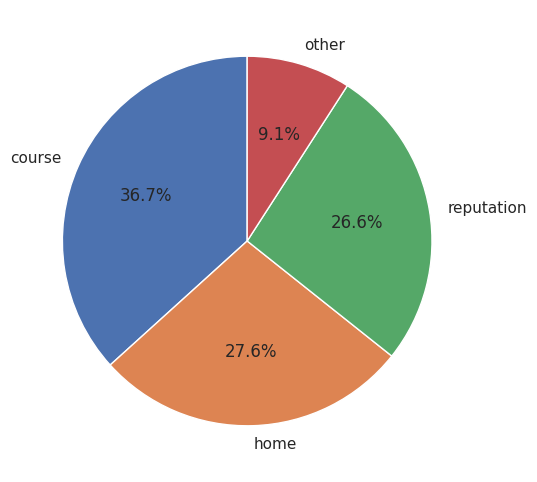

In [30]:
#7-1
import requests,zipfile
from io import StringIO
import io
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r=requests.get(url,stream=True)

z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
student_data_math=pd.read_csv('student-mat.csv',sep=';')

reason_counts = student_data_math["reason"].value_counts()
plt.figure(figsize=(15, 6))
plt.pie(reason_counts, labels=reason_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

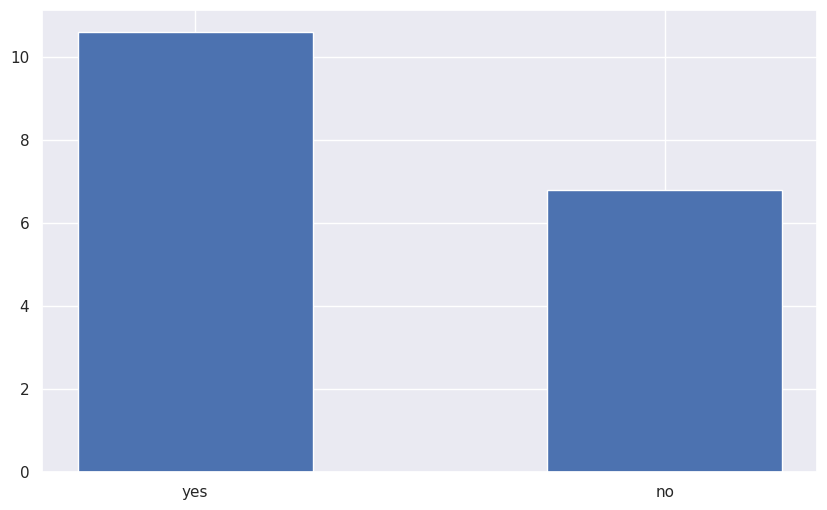

In [32]:
#7-2

plt.figure(figsize=(10,6))

x=student_data_math["higher"].unique()
y=[]
for x_ in x:
    y.append(student_data_math["G3"][student_data_math["higher"] == x_].mean())

plt.bar(x,y,align='center',width=0.5)

plt.grid(True)

<BarContainer object of 4 artists>

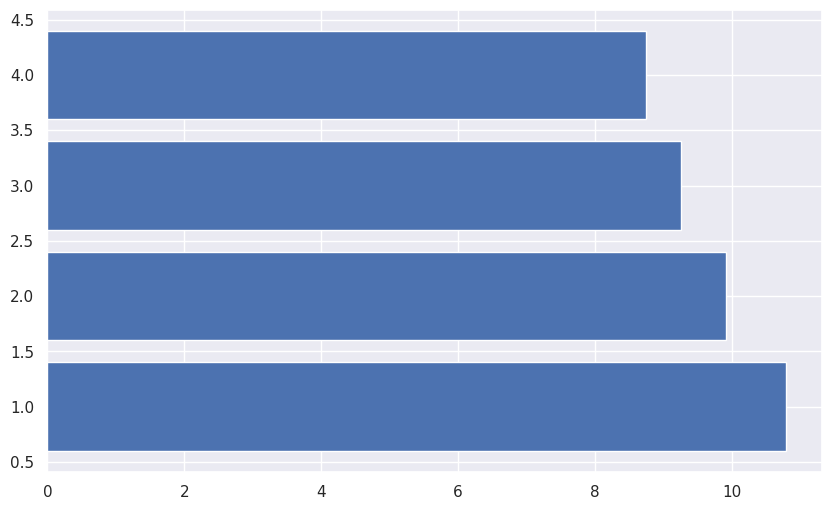

In [33]:
#7-3
plt.figure(figsize=(10,6))

x = student_data_math["traveltime"].unique()
y = []
for x_ in x:
    y.append(student_data_math["G3"][student_data_math["traveltime"] == x_].mean())

plt.barh(x,y)